In [10]:
import numpy as np
import filterpy
from filterpy.kalman import KalmanFilter as kf
from filterpy.kalman import predict, update
from numpy.random import randn
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt

In [11]:
testcase = 2 #Change value to 1 or 2 to test different data
printcase = 1 #To print data put 1

if testcase == 1:
    ztotal = np.array([0.,1,1,3,4]) #[1.,1,0,1,1]])
    ztrue = np.array([0.,1,2,3,4])
    x = np.array([[0.],
                  [1]]) #initial estimate and velocity
elif testcase == 2:
    ztrue = np.zeros(50)
    ztotal = np.zeros(50)
    for j in range(len(ztrue)-1):
        ztrue[j+1] = ztrue[j]+1.25*abs(randn())
        ztotal[j+1] = ztrue[j+1]+2*randn()
    x = np.array([[0.],
                  [1.2]]) #initial estimate and velocity
else:
    print("Variable testcase was not a correct value. Can only be 1 or 2.")
    raise ValueError

n_iter = len(ztotal)
dt = 1. #Time passing between each iteration
#print(n_iter)
x1 = np.zeros(n_iter)
x2 = np.zeros(n_iter)
Pminus = np.zeros(n_iter)
xhat = np.zeros(n_iter)
#print(x2)

In [12]:
f = kf(dim_x=2, dim_z = 1) #Estimating two variables but only taking in one measurement
f.x = x #Estimate
#f.z = z
f.F = np.array([[1,dt],
                [0,1]]) #State Transition Matrix, eqns related to variables
f.P = np.diag([225,49.]) #State Covariance, relation between variables
f.R = 50 #Measurement noise/covariance
f.H = np.array([[1.,0]]) #Measurement function
f.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.1) #Process noise/covariance

Iteration: 0
Estimated Position: 0.18517089730730674
True Position: 0.0
Estimated Velocity: 1.0183473497415323
Iteration: 1
Estimated Position: 2.0914856659844427
True Position: 2.0150601982884804
Estimated Velocity: 1.4599365120857437
Iteration: 2
Estimated Position: 1.4878186117890873
True Position: 3.500318903798283
Estimated Velocity: 0.5144566914297841
Iteration: 3
Estimated Position: 2.668622258441082
True Position: 3.7498757540871765
Estimated Velocity: 0.7625701909507028
Iteration: 4
Estimated Position: 3.8392118406348685
True Position: 3.9087768149560773
Estimated Velocity: 0.887520964115662
Iteration: 5
Estimated Position: 4.4552680857396
True Position: 3.9242841762460694
Estimated Velocity: 0.8171900720127075
Iteration: 6
Estimated Position: 5.7274273424101105
True Position: 5.764678512279877
Estimated Velocity: 0.9196711551581452
Iteration: 7
Estimated Position: 6.522207445700753
True Position: 7.591509592900684
Estimated Velocity: 0.8946072322843404
Iteration: 8
Estimated 

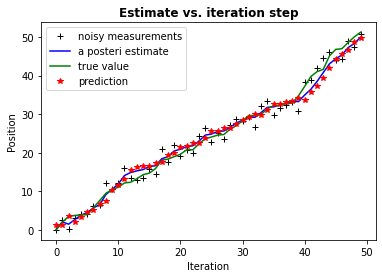

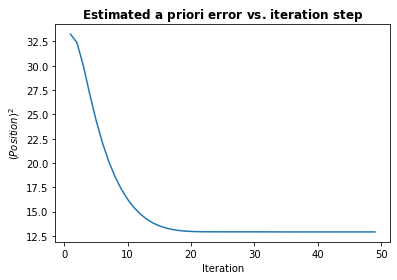

In [13]:
def getmeasurement(i):
    z_current = np.zeros(1)
    z_current[0] = ztotal[i]
    #z_current[1,0] = ztotal[1,i]
    return z_current

def plotstuff():
    plt.figure()
    plt.plot(ztotal,'k+',label='Noisy Measurements')
    plt.plot(x1,'b-',label='A Posteri Estimate')
    plt.plot(ztrue,color='g',label='True Value')
    plt.plot(xhat,'r*',label='Prediction')
    plt.legend()
    plt.title('Estimate vs. Iteration Step', fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('Position')
    
    plt.figure()
    valid_iter = range(1,n_iter) # Pminus not valid at step 0
    plt.plot(valid_iter,Pminus[valid_iter],label='A Priori Error Estimate')
    plt.title('Estimated $\it{\mathbf{a \ priori}}$ Error vs. Iteration Step', fontweight='bold')
    plt.xlabel('Iteration')
    plt.ylabel('$(Position)^2$')
    #plt.setp(plt.gca(),'ylim',[0,.01])
    plt.show()

counter = 0
while True:
    z = getmeasurement(counter)
    f.z = z #Worked without this, do I need it?
    f.predict()
    xjay = f.x
    xhat[counter] = xjay[0,0]
    #print(x)
    f.update(z)
    x = f.x
    x1[counter] = x[0,0]
    #x2[counter] = x[1,0]
    Pminus[counter] = f.P[0,0]
    #np.insert(x1,counter,x[0,0])
    #np.insert(x2,counter,x[1,0])
    #print(x)
    if printcase == 1:
        print("Iteration:", counter)
        print("Estimated Position:", x[0,0])
        print("True Position:", ztrue[counter])
        #print("Estimated Velocity:", x[1,0])
    counter += 1
    if (counter == (n_iter)):
        break
#print(x1)
plotstuff()